In [12]:
import os
import sys
from collections import defaultdict, Counter
from functools import reduce, partial

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from pymutspec.draw import plot_mutspec12

In [4]:
ms12a = pd.read_csv("./3_Derived/mutspec12/cladeA_ms12syn_iqtree.tsv", sep="\t")
ms12b = pd.read_csv("./3_Derived/mutspec12/cladeB_ms12syn_iqtree.tsv", sep="\t")

In [73]:
spectra = pd.read_csv("./2_Raw/Interim/ActinopterygiiPolymorphisms.MutSpecData.csv")
spectra = spectra[
    # (spectra["Gene"] == "CytB") & 
    (spectra["Species"].str.startswith("Engraulis"))]

In [74]:
spectra

,Species,Gene,NumOfFourFoldMut,NumberOfSeq,Class,T.heavy,A.heavy,C.heavy,G.heavy,FrA.heavy,FrT.heavy,FrG.heavy,FrC.heavy,A_G.heavy,A_T.heavy,A_C.heavy,T_G.heavy,T_A.heavy,T_C.heavy,G_T.heavy,G_C.heavy,G_A.heavy,C_G.heavy,C_T.heavy,C_A.heavy,A_G.SubstRate.heavy,A_T.SubstRate.heavy,A_C.SubstRate.heavy,T_G.SubstRate.heavy,T_A.SubstRate.heavy,T_C.SubstRate.heavy,G_T.SubstRate.heavy,G_C.SubstRate.heavy,G_A.SubstRate.heavy,C_G.SubstRate.heavy,C_T.SubstRate.heavy,C_A.SubstRate.heavy,temperature,matur_tm
404,Engraulis_encrasicolus,CytB,46,14,Actinopterygii,1014,821,324,650,0.292275,0.360983,0.231399,0.115344,6,1,0,0,2,14,0,2,6,2,13,0,0.007308,0.001218,0.0,0.0,0.001972,0.013807,0.0,0.003077,0.009231,0.006173,0.040123,0.0,14.15,1.0


In [75]:
Counter("TTTGGATCCCTTTTAGGACTATGCTTGGCCACACAAATCCTTACAGGACTTTTCCTAGCCATACACTACACCTCAGACATCGCTACCGCTTTCTCGTCAGTGGCCCACATTTGTCGAGACGTAAATTACGGGTGACTTATCCGAAATATGCATGCAAACGGAGCCTCATTCTTTTTCATCTGCATTTATGCACACATTGCTCGGGGACTGTACTACGGTTCTTATCTTTACATAGAAACTTGAAACATCGGAGTAGTACTACTTCTTTTAGTTATGATGACTGCCTTCGTTGGGTACGTACTACCCTGAGGACAAATGTCCTTCTGAGGGGCAACTGTCATTACTAACCTTATGTCTGCAGTTCCTTACGTGGGCACTGAATTAGTCCAATGAATTTGAGGAGGCTTTTCGGTCGACAACGCGACTCTTACTCGGTTCTTCGCCTTCCACTTCTTGTTCCCCTTCGTCATTGCGGGTGTTACTATCCTTCACCTTTTATTTTTACACGAAACAGGGTCTAACAACCCAGCGGGGCTCAATTCTGACGCCGATAAAATCGCATTCCACCCATACTTCTCTTATAAAGATCTCTTAGGGTTCGCAGTAATGCTGCTGGCACTAACCTCACTGGCATTATTTTCCCCTAACTTATTAGGAGACCCTGATAATTTTACCCCAGCTAATCCCCTTGTCACCCCACCTCATATTAAGCCTGAGTGATACTTCCTCTTTGCTTACGCTATTCTCCGGTCTATCCCGAACAAACTAGGTGGAGTACTTGCCCTCCTATTTTCTATTCTAGTTCTTATGGTCGTACCCATCTTGCACACCTCTAAACAACGAGGAATTACTTTCCGACCCATTACGCAGTTCCTATTCTGAACCCTTGTTGCCGACGTCATCATTCTTACATGAATCGGAGGTATGCCAGTCGAACACCCATTCATTATTATTGGTCAAGTAGCATCGCTACTCTACTTCTCTATTTTCCTTGTACTAGCTCCGGTGGCAGGATGACTAGAGAACAAAGCCCTAAACTGAAACT")

Counter({'T': 331, 'G': 184, 'A': 247, 'C': 283})

In [76]:
spectra.columns

Index(['Species', 'Gene', 'NumOfFourFoldMut', 'NumberOfSeq', 'Class',
       'T.heavy', 'A.heavy', 'C.heavy', 'G.heavy', 'FrA.heavy', 'FrT.heavy',
       'FrG.heavy', 'FrC.heavy', 'A_G.heavy', 'A_T.heavy', 'A_C.heavy',
       'T_G.heavy', 'T_A.heavy', 'T_C.heavy', 'G_T.heavy', 'G_C.heavy',
       'G_A.heavy', 'C_G.heavy', 'C_T.heavy', 'C_A.heavy',
       'A_G.SubstRate.heavy', 'A_T.SubstRate.heavy', 'A_C.SubstRate.heavy',
       'T_G.SubstRate.heavy', 'T_A.SubstRate.heavy', 'T_C.SubstRate.heavy',
       'G_T.SubstRate.heavy', 'G_C.SubstRate.heavy', 'G_A.SubstRate.heavy',
       'C_G.SubstRate.heavy', 'C_T.SubstRate.heavy', 'C_A.SubstRate.heavy',
       'temperature', 'matur_tm'],
      dtype='object')

In [77]:
columns_rate = ['A_G.SubstRate.heavy', 'A_T.SubstRate.heavy', 'A_C.SubstRate.heavy',
       'T_G.SubstRate.heavy', 'T_A.SubstRate.heavy', 'T_C.SubstRate.heavy',
       'G_T.SubstRate.heavy', 'G_C.SubstRate.heavy', 'G_A.SubstRate.heavy',
       'C_G.SubstRate.heavy', 'C_T.SubstRate.heavy', 'C_A.SubstRate.heavy',]

In [78]:
ms_some_anch = spectra[columns_rate].rename(columns=lambda x: x[:3].replace("_", ">")).T
ms_some_anch.index.name = "Mut"
ms_some_anch.columns = ["MutSpec"]
ms_some_anch = ms_some_anch.reset_index()

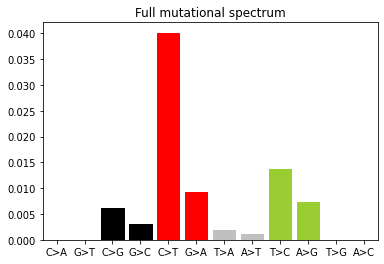

<AxesSubplot:title={'center':'Full mutational spectrum'}>

In [79]:
plot_mutspec12(ms_some_anch)

In [44]:
ms12a["Who"] = "A"
ms12b["Who"] = "B"
ms_some_anch["Who"] = "Engraulis_encrasicolus\n(old spectra)"

In [49]:
ms_some_anch["MutSpec"] = ms_some_anch["MutSpec"] / ms_some_anch["MutSpec"].sum()

In [52]:
sbs12_ordered = ["C>A", "G>T", "C>G", "G>C", "C>T", "G>A", "T>A", "A>T", "T>C", "A>G", "T>G", "A>C"]

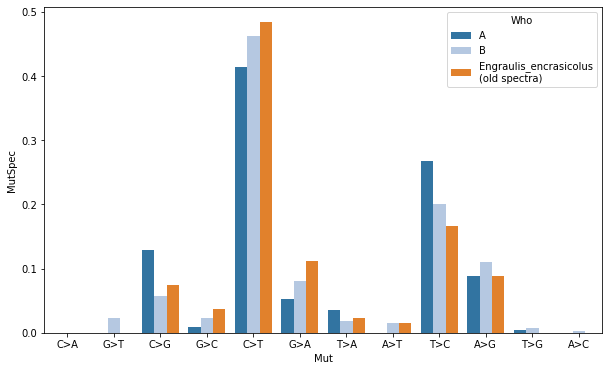

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pd.concat([ms12a,ms12b, ms_some_anch]), x="Mut", y="MutSpec", hue="Who", order=sbs12_ordered, palette="tab20")
plt.show()